1/ Importation framework & data

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pathlib import Path
import subprocess
import sys
from pathlib import Path

BASE_DIR = Path(r"C:/Users/coach/Desktop/datascientest/OpenClassrooms/Projects_MLops/Projet_1_initialisation_MLops")
DATA_RAW = BASE_DIR / "data/raw"
DATA_PROC = BASE_DIR / "data/proceed"
SRC_DIR = BASE_DIR / "src"

DATA_PROC.mkdir(parents=True, exist_ok=True)

train_raw = pd.read_csv(BASE_DIR / "data/raw/application_train.csv")
test_raw = pd.read_csv(DATA_RAW / "application_test.csv")

print("Train shape:", train_raw.shape)
print("Test shape :", test_raw.shape)

train_raw.head()

Train shape: (307511, 122)
Test shape : (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


2/ Analyse Graphique des data

Counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Proportions:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


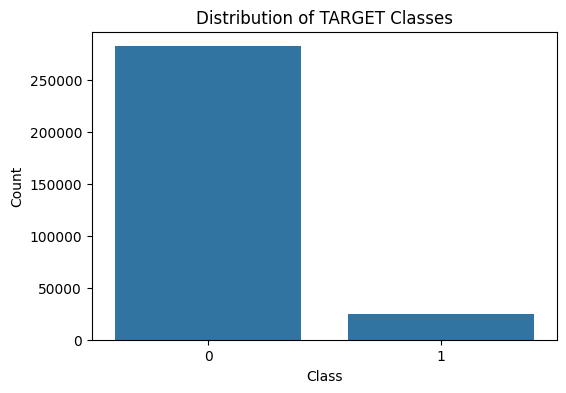

<Figure size 1200x600 with 0 Axes>

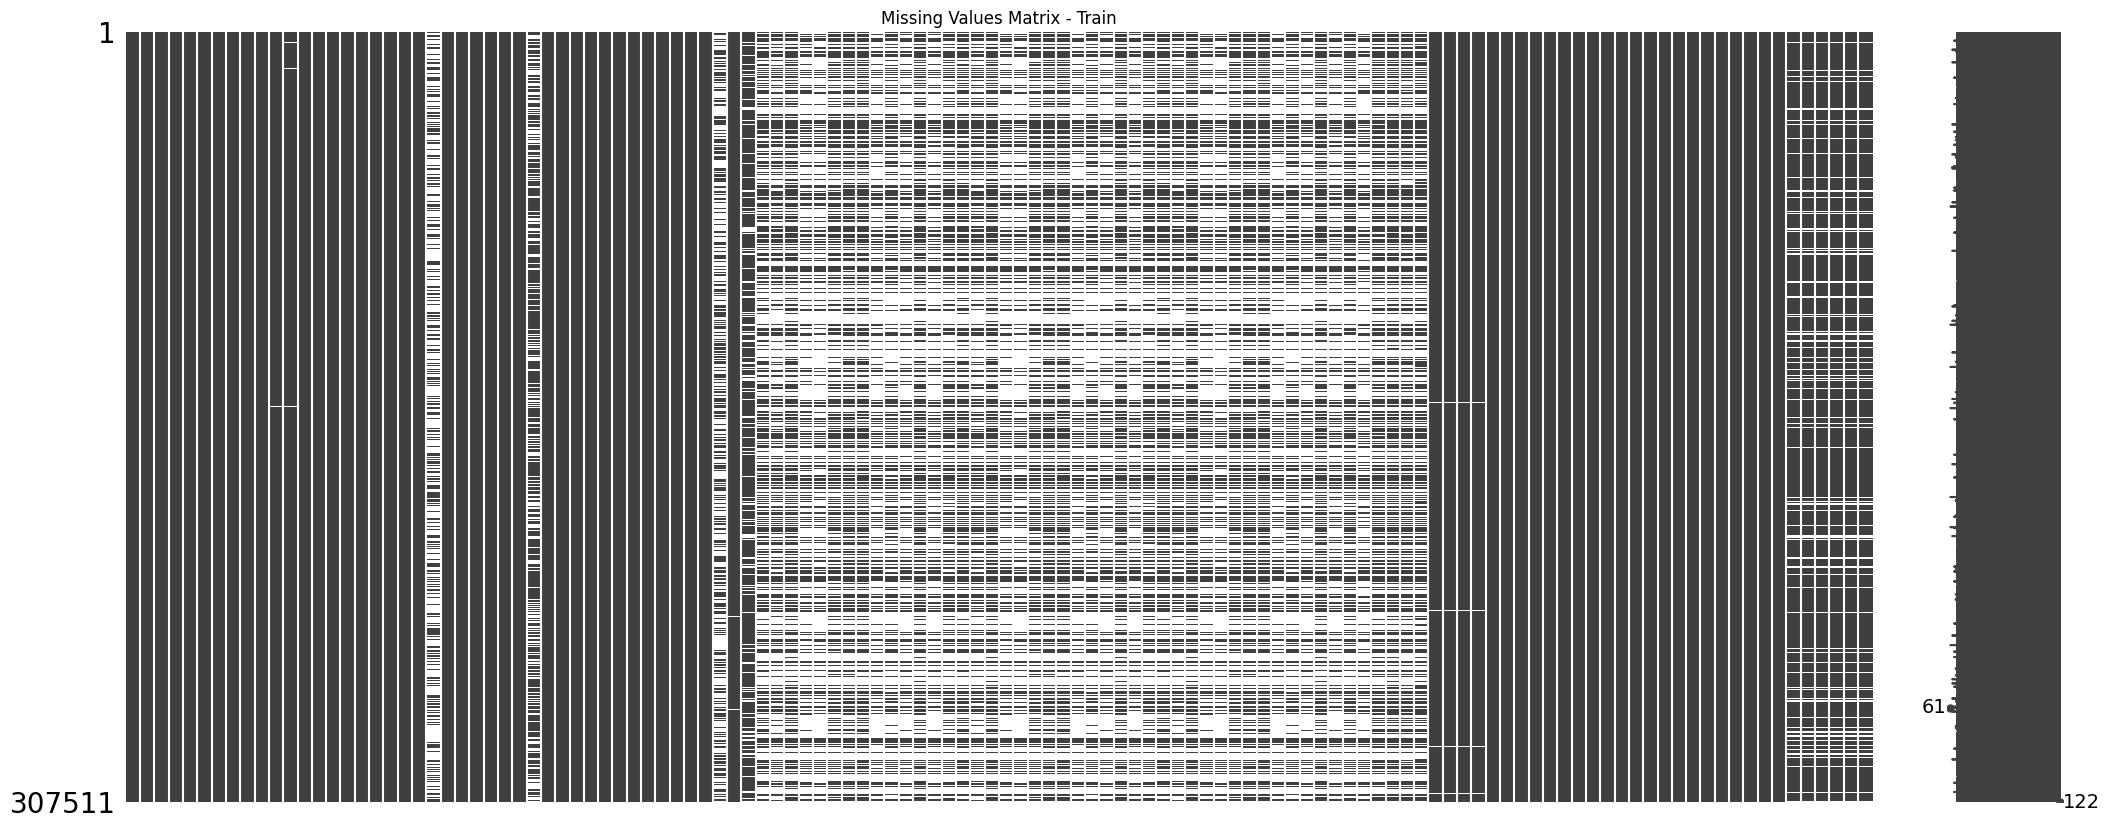

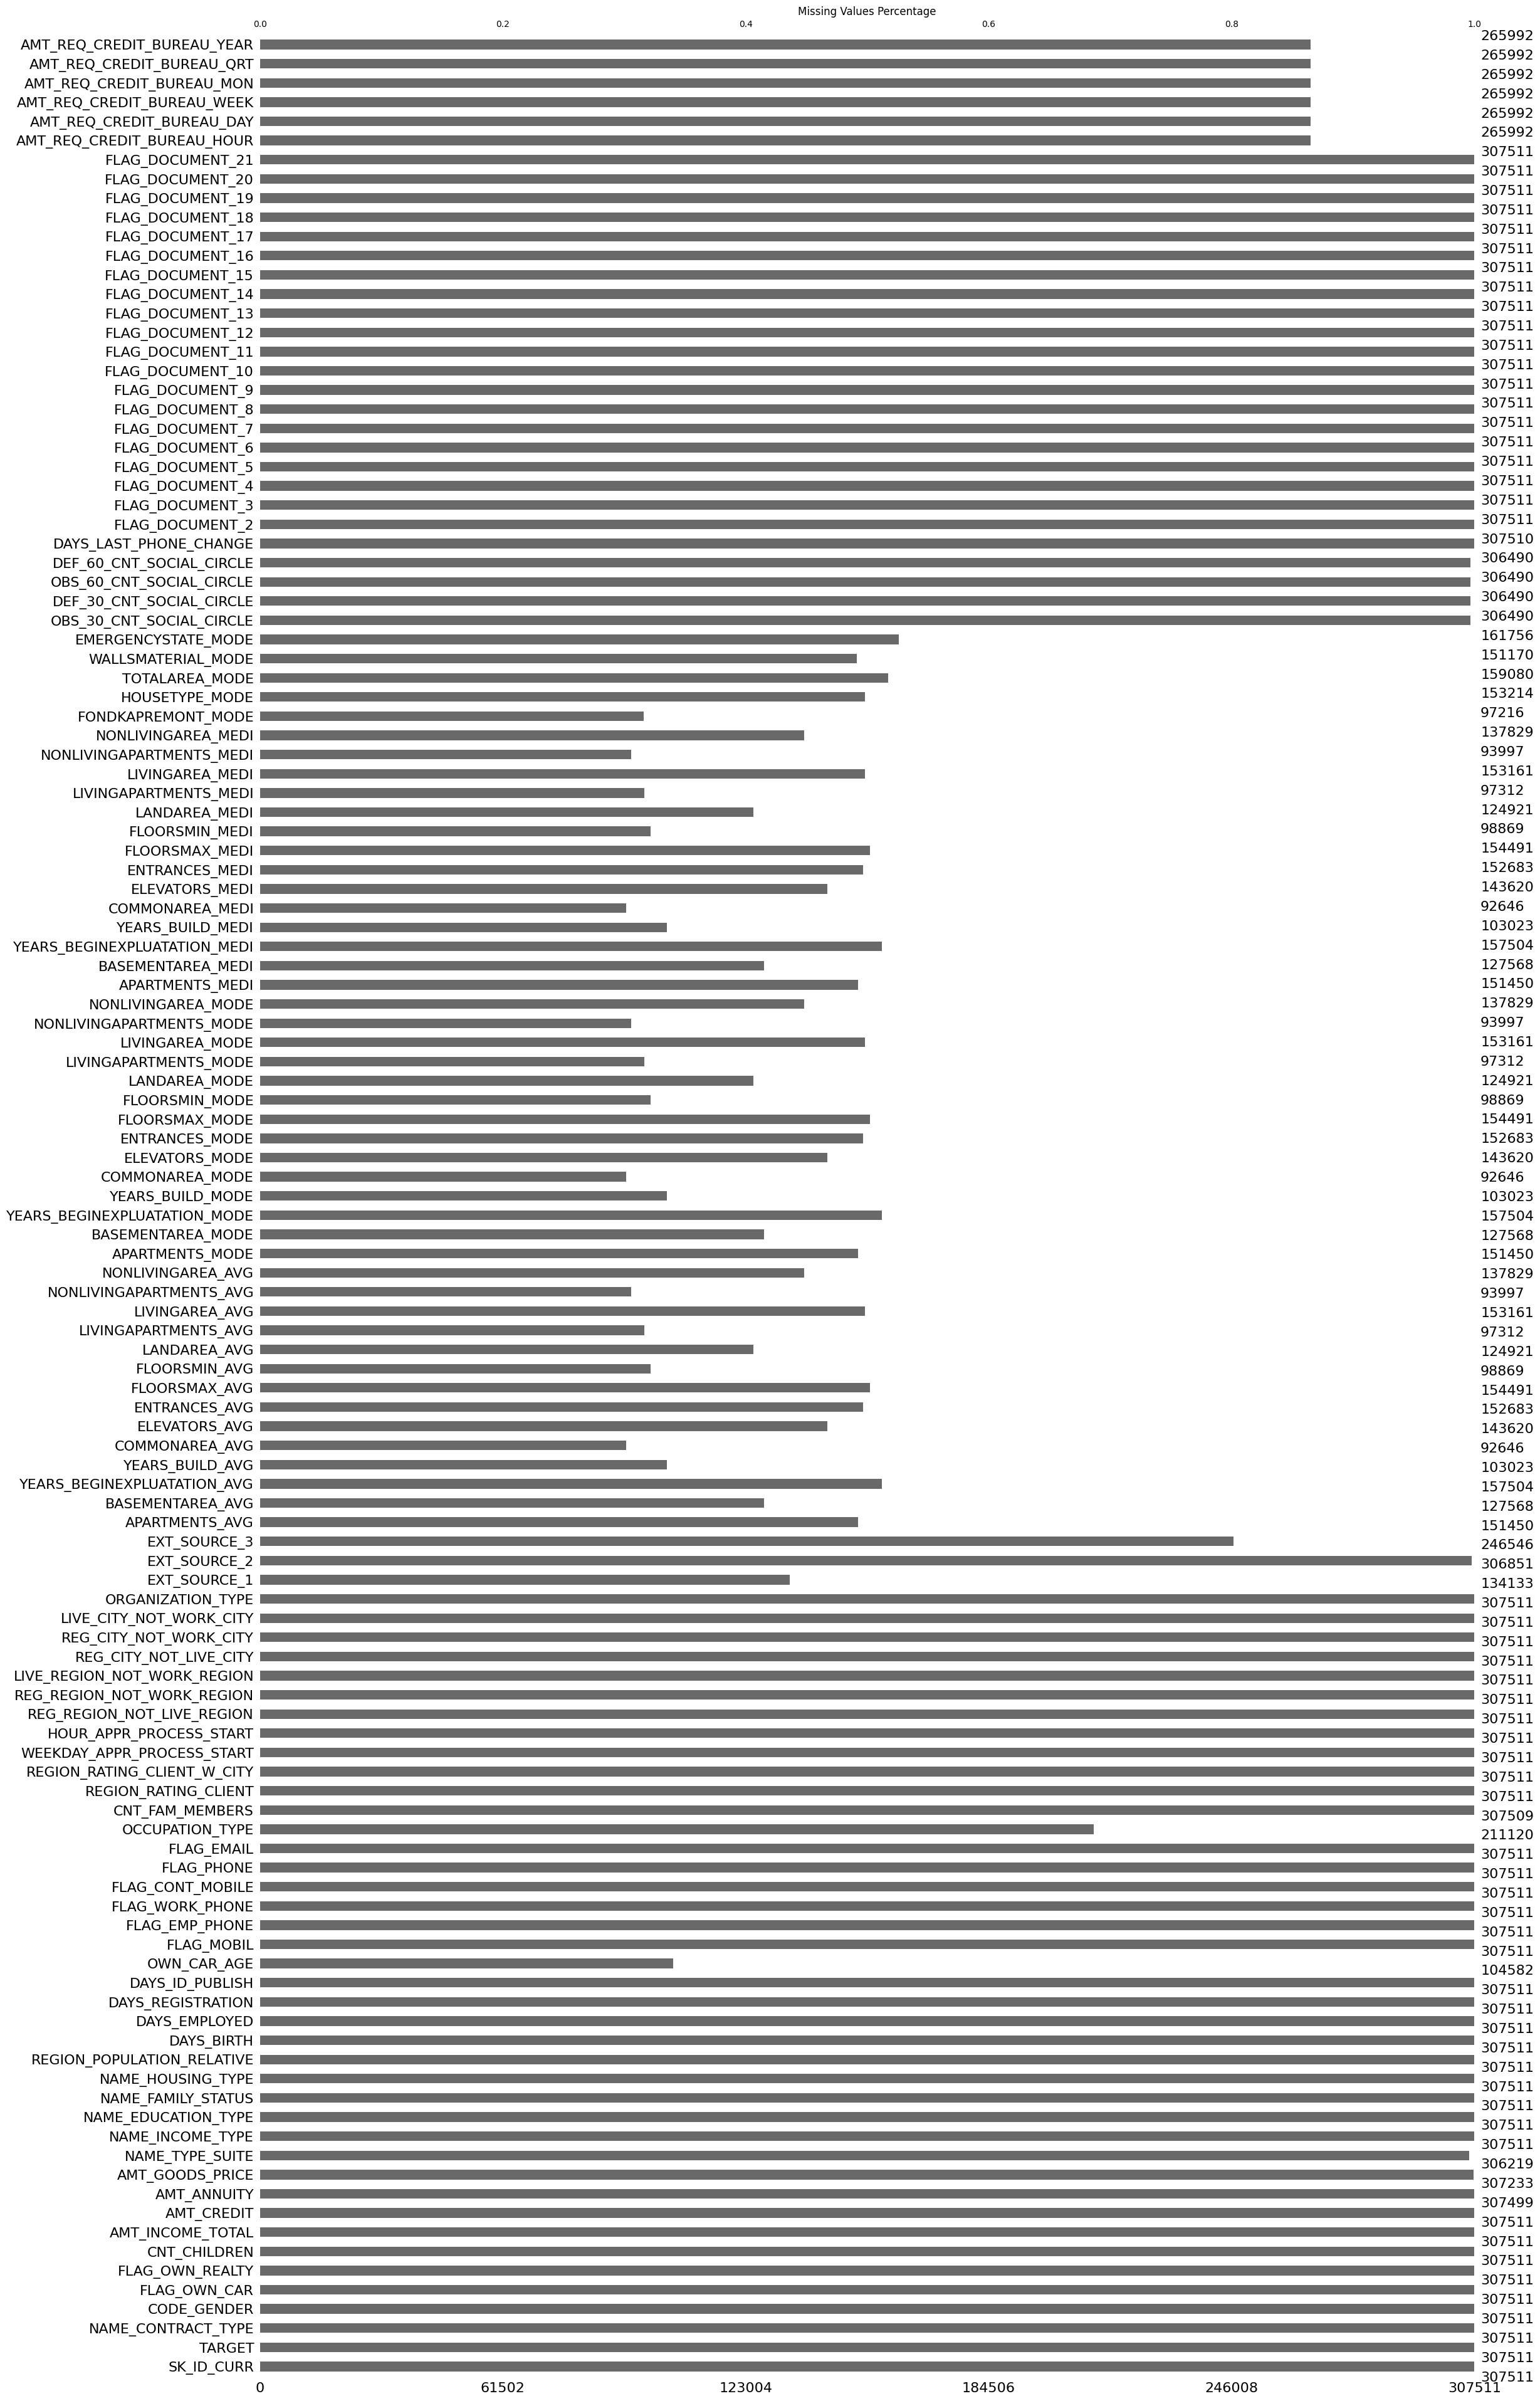

<Figure size 1000x600 with 0 Axes>

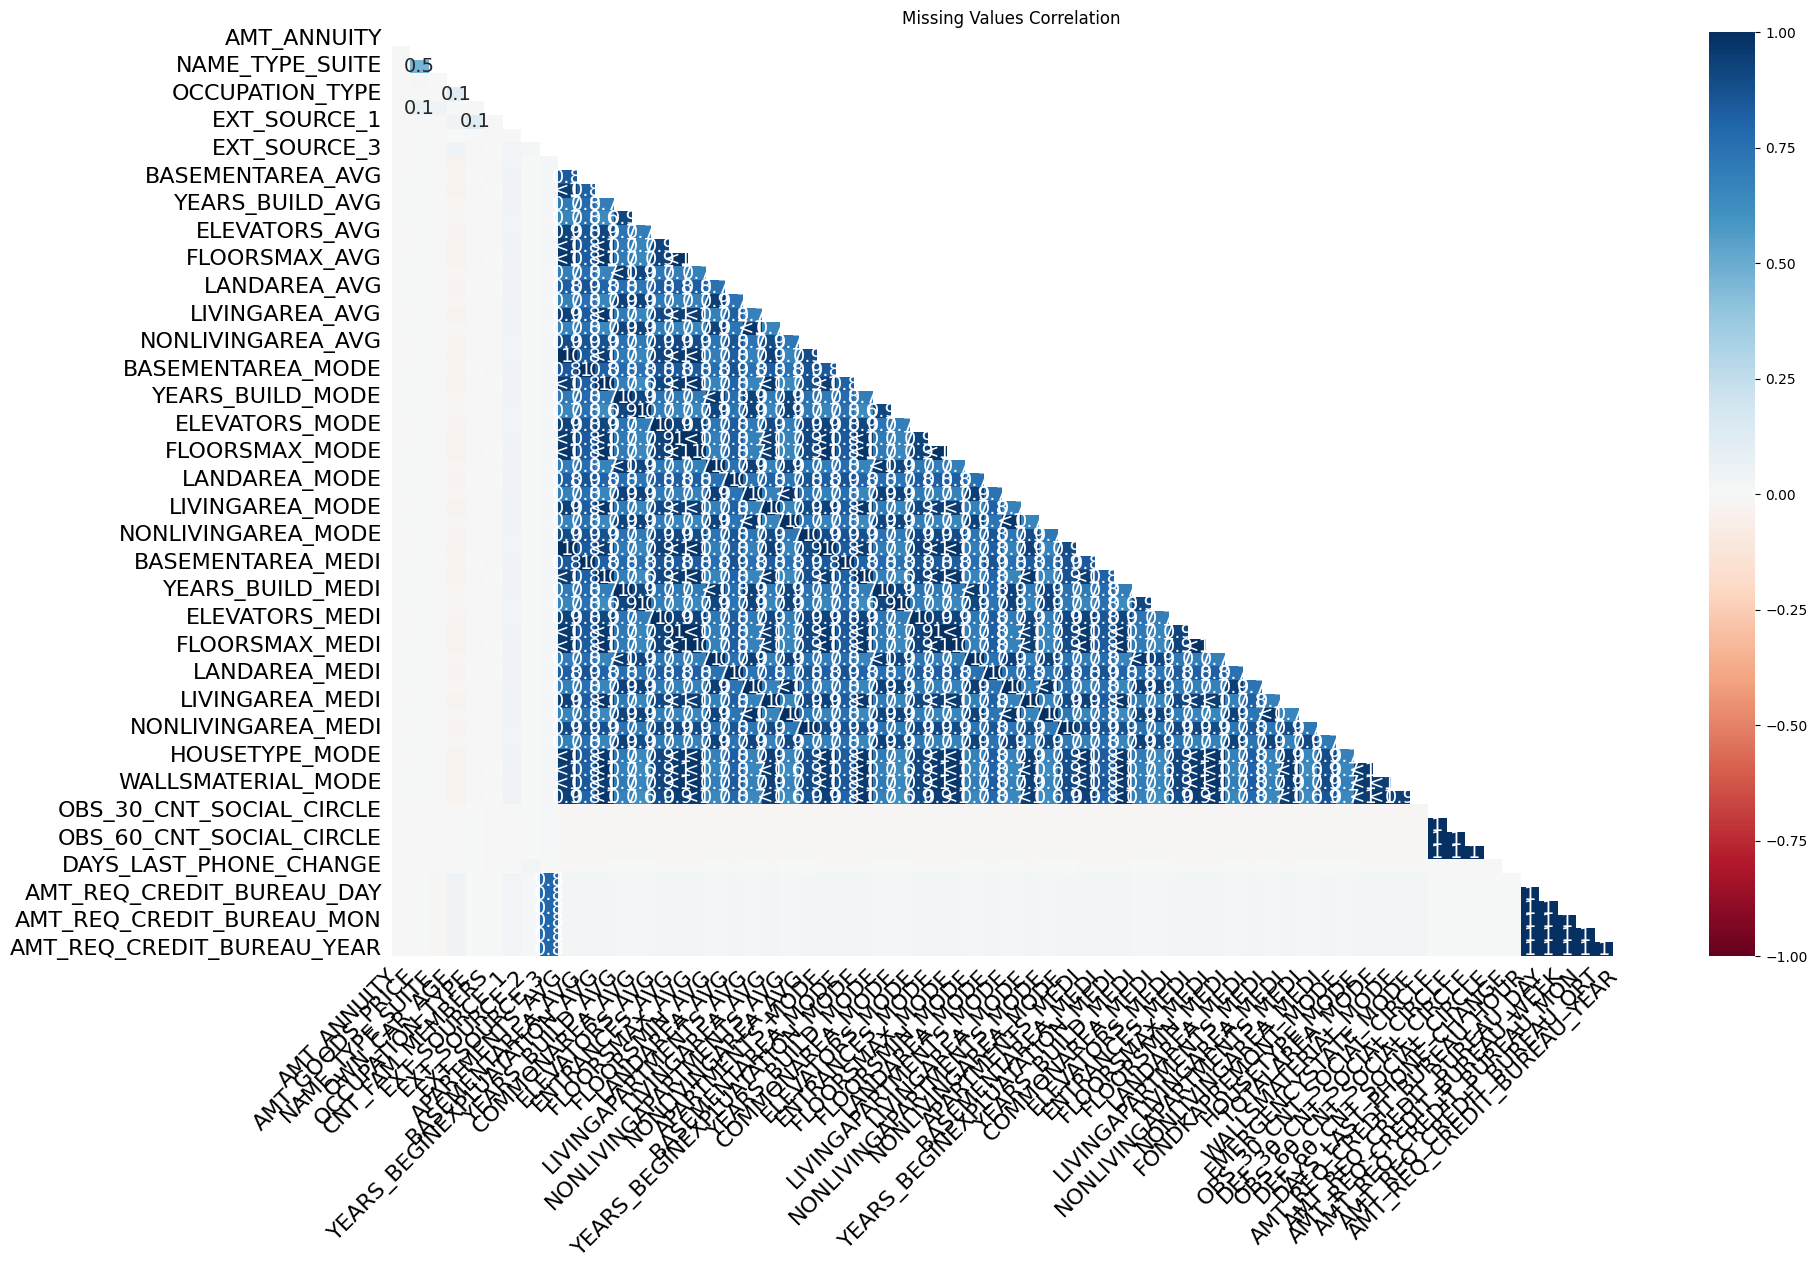

In [4]:

# distribution des classes cibles
target_counts = train_raw["TARGET"].value_counts()
print("Counts:")
print(target_counts)
print("\nProportions:")
print(train_raw["TARGET"].value_counts(normalize=True))
plt.figure(figsize=(6,4))
sns.barplot(
    x=target_counts.index,
    y=target_counts.values
)
plt.title("Distribution of TARGET Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#visualisation des valeurs manquantes avec missingno
plt.figure(figsize=(12,6))
msno.matrix(train_raw) # affichage matrice
plt.title("Missing Values Matrix - Train")
plt.show()

plt.figure(figsize=(10,6))
msno.bar(train_raw) # affichage en barre
plt.title("Missing Values Percentage")
plt.show()

plt.figure(figsize=(10,6))
msno.heatmap(train_raw) # affichage corrélationcarte des chaleurs
plt.title("Missing Values Correlation")
plt.show()


3/ Preprocessing

In [5]:
sys.path.insert(0, str(SRC_DIR))
from fearturing2 import build_dataset
build_dataset(debug=True)

# check final datasets
final_df = pd.read_csv(DATA_PROC / "homecredit_features.csv")
final_df.shape
final_df.head()
final_df["TARGET"].value_counts(normalize=True)

Starting preprocessing...
Loading application data...
Processing bureau...
Processing previous applications...
Processing installments...
Processing credit card...
Dropping 17 sparse columns
Final shape: (60000, 257)
Saved to: C:\Users\coach\Desktop\datascientest\OpenClassrooms\Projects_MLops\Projet_1_initialisation_MLops\data\proceed\homecredit_features.csv


TARGET
0.0    0.9199
1.0    0.0801
Name: proportion, dtype: float64